In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'
import numpy as np
import xarray as xr
sys.path.append('..')
import project

--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: dv001
--------------------------------------------------------------------------


In [3]:
%autoreload
emory4dct = project.imaging.Emory4DCT('../data/Emory-4DCT')
emory4dct.load_images()

Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T00_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T10_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T20_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T30_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T40_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T50_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T60_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T70_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T80_s.img
Loading ../data/Emory-4DCT/Case1Pack/Images/case1_T90_s.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T00-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T10-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T20-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T30-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T40-ssm.img
Loading ../data/Emory-4DCT/Case2Pack/Images/case2_T50-ssm.img
Loading ../data/Emory-4DCT/C

In [4]:
%autoreload
import xarray as xr

for i in range(1, len(emory4dct)):
    print(i)

    # register all cases to case 1 at EI phase
    array_fix = emory4dct[0].array.sel(phase=0)
    array_mov = emory4dct[i].array.sel(phase=0)
    transform = project.register.register_array(
        array_mov, array_fix,
        learning_rate=1.0,
        num_iterations=100,
        transform='similarity'
    )

    # apply same transformation to all phases
    all_warped = []
    for phase in emory4dct.phases:
        array_fix = emory4dct[0].array.sel(phase=phase)
        array_mov = emory4dct[i].array.sel(phase=phase)
        array_warp = project.register.transform_array(
            array_mov, array_fix, transform, default=0
        )
        all_warped.append(array_warp)
        
    emory4dct[i].warped = xr.concat(all_warped, dim=emory4dct[i].array.phase)

1
[level 1|iteration 0] error = 339762.6752
[level 1|iteration 10] error = 228015.1407
[level 1|iteration 20] error = 207090.6609
[level 1|iteration 30] error = 181713.5027
[level 1|iteration 40] error = 136887.8292
[level 1|iteration 50] error = 103077.5870
[level 1|iteration 60] error = 91636.2411
[level 1|iteration 70] error = 87657.8502
[level 1|iteration 80] error = 86450.3714
[level 1|iteration 90] error = 85937.8450
[level 2|iteration 0] error = 103024.4931
[level 3|iteration 0] error = 268025.8854
[level 3|iteration 10] error = 131386.7621
[level 3|iteration 20] error = 123045.7927
[level 3|iteration 30] error = 121137.8741
[level 3|iteration 40] error = 120417.5705
[level 3|iteration 50] error = 120158.8175
[level 3|iteration 60] error = 119935.4147
[level 3|iteration 70] error = 119812.9145
[level 3|iteration 80] error = 119751.2179
[level 3|iteration 90] error = 119716.8708
2
[level 1|iteration 0] error = 284957.1734
[level 1|iteration 10] error = 265716.7957
[level 1|iterat

<IPython.core.display.Javascript object>


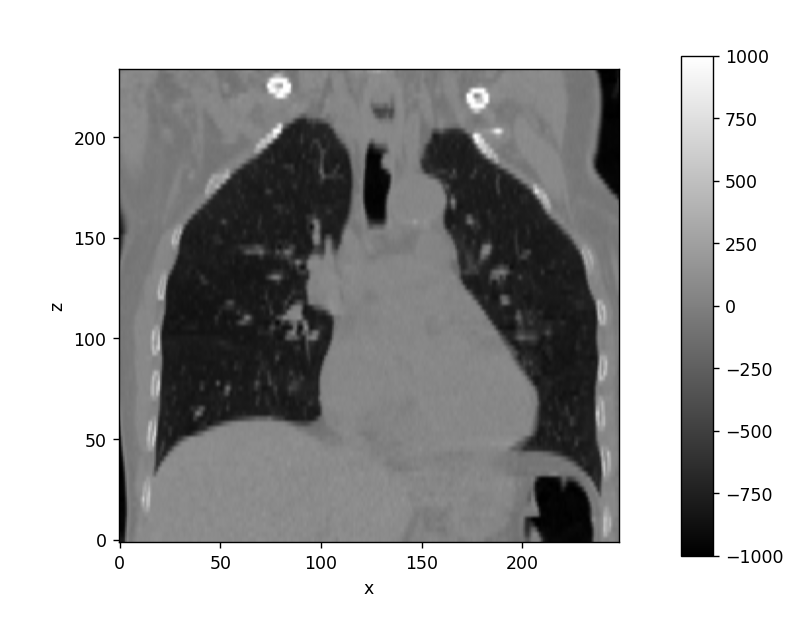

interactive(children=(SelectionSlider(description='phase', options=((0, 0), (10, 1), (20, 2), (30, 3), (40, 4)…

In [17]:
project.visual.view(emory4dct[0].array, x='x', y='z')

<IPython.core.display.Javascript object>


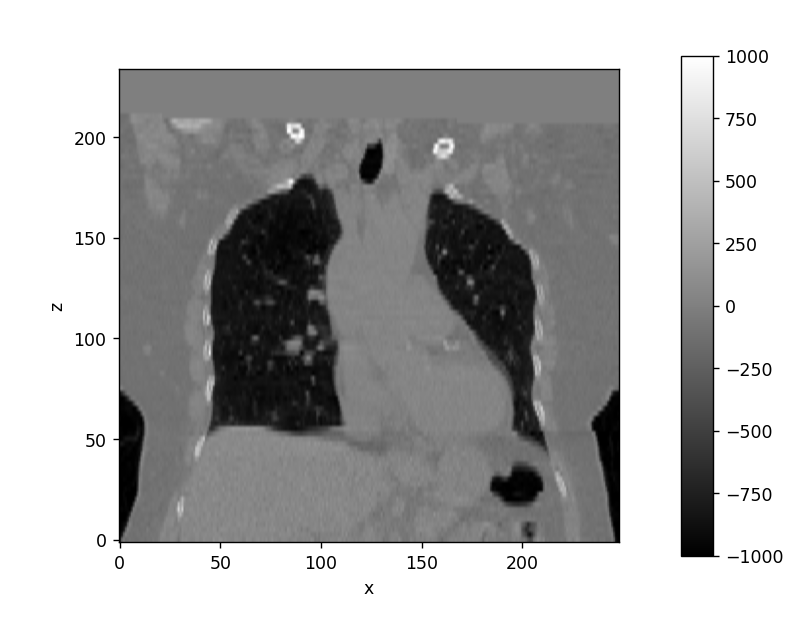

interactive(children=(SelectionSlider(description='phase', options=((0, 0), (10, 1), (20, 2), (30, 3), (40, 4)…

In [18]:
i = 9
emory4dct[i].warped.name = 'CT'
project.visual.view(emory4dct[i].warped, x='x', y='z')

In [20]:
emory4dct.save_niftis()

Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T00.nii.gz
Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T10.nii.gz
Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T20.nii.gz
Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T30.nii.gz
Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T40.nii.gz
Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T50.nii.gz
Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T60.nii.gz
Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T70.nii.gz
Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T80.nii.gz
Saving ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T90.nii.gz
Saving ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T00.nii.gz
Saving ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T10.nii.gz
Saving ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T20.nii.gz
Saving ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T30.nii.gz
Saving ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T40.nii.gz
Saving ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T50.nii.gz
Saving ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T60.nii.